# Linear Regression

Linear Regression: Continous Variable
Linear regression is used for finding linear relationship between target and one or more predictors

There are two types of linear regression:
- Simple and 
- Multiple 

# Simple Linear Regression
Simple linear regression may be used to determine the connection between two continuous variables. One is a predictor or an independent variable, while the other is a reaction or a dependent variable. It seeks a statistical link as opposed to a deterministic one. A deterministic relationship exists between two variables. if one variable can be precisely represented by the other variable. For instance, it is feasible to precisely anticipate Fahrenheit temperatures using Celsius temperatures. In identifying the link between two variables, statistical correlation is inaccurate. Consider the relationship between time and distance, for instance.

### Equation of simple linear regression

y= mx+c

Here,
- y: Target Variable or Dependent variable
- m: Slope of the equation
- x: Independent variable or Predictor
- c: constant

### How do we draw the map?
The fundamental concept is to choose a line that best matches the data. The best-fitting line is the one with the smallest overall prediction error (across all data points). The distance between a point and the regression line called the error.

### Example:
Suppose there is a dataset containing information regarding the correlation between the number of hours spent studying and the grades earned. Several pupils have been monitored, and their study hours and grades have been recorded. This constitutes our training data.

The objective is to develop a model that can predict grades given the amount of hours spent studying. Using the training data, a regression line with least error is determined. The linear equation is then applied to any additional data. Thus, if a student's number of hours of study is entered, our model should predict their grade with little error.

Y(pred) = c+m*x

The values c and m must be selected in order to minimize the mistake. If sum of squared error is used as a measure to assess the model, the objective is to find the line that minimizes error the most. Therefore, in Simple linear regression, the number of iterations is conducted to determine the value of m for which the error (Residue) is the smallest. After m is determined, the slope is drawn, therefore completing the model.

# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading Dataset

In [2]:
data=pd.read_csv("CarPricesData.csv")
df=data.copy()
df.head()

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
0,13500,23.0,46986,Diesel,90,1,0,2000.0,3,1165.0
1,13750,23.0,72937,Diesel,90,1,0,2000.0,3,1165.0
2,13950,24.0,41711,Diesel,90,1,0,2000.0,3,1165.0
3,14950,26.0,48000,Diesel,90,0,0,2000.0,3,1165.0
4,13750,30.0,38500,Diesel,90,0,0,2000.0,3,1170.0


# Removing duplicate rows

In [3]:
print('Shape before deleting duplicate values: ', df.shape)
df=df.drop_duplicates()
print('Shape after deleting duplicate values: ', df.shape)
df.head()

Shape before deleting duplicate values:  (1436, 10)
Shape after deleting duplicate values:  (1435, 10)


,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
0,13500,23.0,46986,Diesel,90,1,0,2000.0,3,1165.0
1,13750,23.0,72937,Diesel,90,1,0,2000.0,3,1165.0
2,13950,24.0,41711,Diesel,90,1,0,2000.0,3,1165.0
3,14950,26.0,48000,Diesel,90,0,0,2000.0,3,1165.0
4,13750,30.0,38500,Diesel,90,0,0,2000.0,3,1170.0


# Basic Data Exploration

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1435 entries, 0 to 1435
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Price      1435 non-null   int64  
 1   Age        1433 non-null   float64
 2   KM         1435 non-null   int64  
 3   FuelType   1431 non-null   object 
 4   HP         1435 non-null   int64  
 5   MetColor   1435 non-null   int64  
 6   Automatic  1435 non-null   int64  
 7   CC         1433 non-null   float64
 8   Doors      1435 non-null   int64  
 9   Weight     1433 non-null   float64
dtypes: float64(3), int64(6), object(1)
memory usage: 123.3+ KB


`Observation`: There are three data types which are int, float, categorical. that means numerical and categorical data are available

In [5]:
df.describe(include='all')

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
count,1435.000000,1433.000000,1435.000000,1431,1435.000000,1435.000000,1435.000000,1433.000000,1435.000000,1433.000000
unique,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,Petrol,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,1260,NaN,NaN,NaN,NaN,NaN,NaN
mean,10720.915679,56.020237,68571.782578,NaN,101.491986,0.674564,0.055749,1566.688765,4.032753,1072.314724
std,3608.732978,18.544948,37491.094553,NaN,14.981408,0.468701,0.229517,186.893360,0.952667,52.283038
min,4350.000000,1.000000,1.000000,NaN,69.000000,0.000000,0.000000,1300.000000,2.000000,1000.000000
25%,8450.000000,44.000000,43000.000000,NaN,90.000000,0.000000,0.000000,1400.000000,3.000000,1040.000000
50%,9900.000000,61.000000,63451.000000,NaN,110.000000,1.000000,0.000000,1600.000000,4.000000,1070.000000
75%,11950.000000,70.000000,87041.500000,NaN,110.000000,1.000000,0.000000,1600.000000,5.000000,1085.000000


`Observation`: The minimum value of Age and KM is 1. This is not possible for old car band sales dataset. 

In [6]:
df.isnull().sum()

Price        0
Age          2
KM           0
FuelType     4
HP           0
MetColor     0
Automatic    0
CC           2
Doors        0
Weight       2
dtype: int64

`Observation`: Missing value is found in Age, FuelType, CC, and Weight columns

`Observation`: All are numerical values except FuelType

# Visualization

In [7]:
def PlotBarCharts(inpdata, colsToPlot):
    fig, subplot=plt.subplots(nrows=1,ncols=len(colsToPlot),figsize=(20,5))
    fig.suptitle('Bar charts of: '+str(colsToPlot))
    for colname, plotnumber in zip(colsToPlot,range(len(colsToPlot))):
        inpdata.groupby(colname).size().plot(kind='bar',ax=subplot[plotnumber])

# Categorical Variables

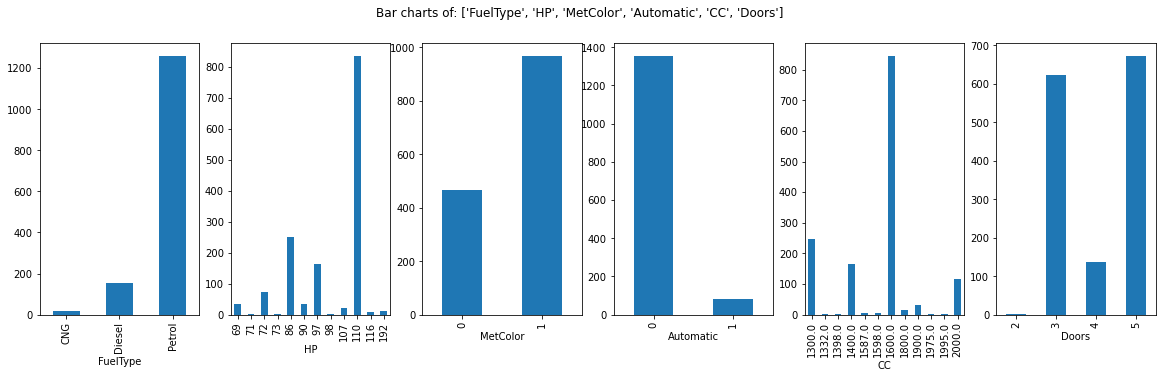

In [8]:
#Calling the function
columns_name=['FuelType', 'HP', 'MetColor', 'Automatic', 'CC', 'Doors']
PlotBarCharts(inpdata=df,colsToPlot=columns_name)

# Continuous Variables

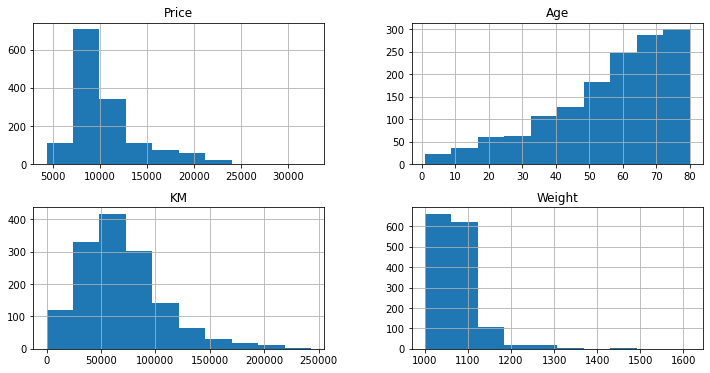

In [9]:
df.hist(['Price','Age', 'KM','Weight'], figsize=(12,6))
plt.show()

# Visual exploration of relationship between variables

- Continuous Vs Continuous ---- Scatter Plot
- Categorical Vs Continuous---- Box Plot
- Categorical Vs Categorical---- Grouped Bar Plots

### Continuous Vs Continuous ---- Scatter Plot

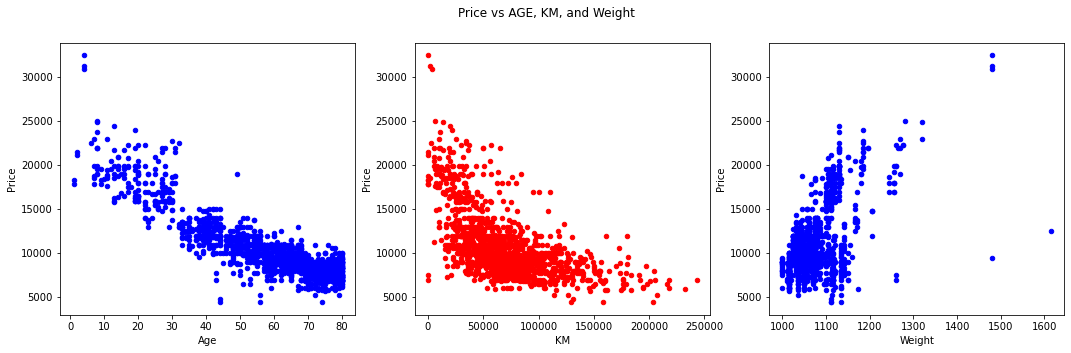

In [34]:
fig, subplot=plt.subplots(nrows=1, ncols=3, figsize=(18,5))
fig.suptitle("Price vs AGE, KM, and Weight")

#Generating multiple scatter charts again after the outlier treatment
df.plot.scatter(x='Age',y='Price',marker='o',color='blue',ax=subplot[0])
df.plot.scatter(x='KM',y='Price',marker='o',color='red',ax=subplot[1])
df.plot.scatter(x='Weight',y='Price',marker='o',color='blue',ax=subplot[2])

plt.show()

# Statistical Feature Selection (Continuous Vs Continuous) using Correlation Matrix

In [11]:
#Calculating correlation matrix
continuous_columns=['Price','Age','KM','Weight']
#Creating the correlation matrix
correlation_data=df.corr()
correlation_data

,Price,Age,KM,HP,MetColor,Automatic,CC,Doors,Weight
Price,1.000000,-0.875951,-0.569420,0.314134,0.107604,0.033928,0.159242,0.183604,0.575794
Age,-0.875951,1.000000,0.503485,-0.156209,-0.105895,0.030887,-0.130827,-0.147008,-0.465909
KM,-0.569420,0.503485,1.000000,-0.332904,-0.079864,-0.082168,0.305182,-0.035193,-0.024290
HP,0.314134,-0.156209,-0.332904,1.000000,0.058272,0.013313,0.048389,0.091803,0.087472
MetColor,0.107604,-0.105895,-0.079864,0.058272,1.000000,-0.019222,0.034512,0.084796,0.056026
Automatic,0.033928,0.030887,-0.082168,0.013313,-0.019222,1.000000,-0.069324,-0.027492,0.058379
CC,0.159242,-0.130827,0.305182,0.048389,0.034512,-0.069324,1.000000,0.126476,0.650142
Doors,0.183604,-0.147008,-0.035193,0.091803,0.084796,-0.027492,0.126476,1.000000,0.301438
Weight,0.575794,-0.465909,-0.024290,0.087472,0.056026,0.058379,0.650142,0.301438,1.000000


In [12]:
#Filtering only those columns where absolute correlation>0.5 with Target variable
#reduce the 0.5 threshold if no variable is selected
correlation_data['Price'][abs(correlation_data['Price'])>0.5]

Price     1.000000
Age      -0.875951
KM       -0.569420
Weight    0.575794
Name: Price, dtype: float64

# Statistical Feature Selection (Categorical Vs Continuous) using ANOVA test

In [13]:
#Running the one-way anova test between Price and FuelTypes
#Assumption (H0) is that FuelType and Prices are NOT Corelated
from scipy.stats import f_oneway
# Defining a function to find the statistical relationship with all the categorical variables

def functionAnova(inputData, targetVariable, categoricalPredictorList):
    selectPredictors=[]
    print("ANOVA Results \n")
    
    for predictor in categoricalPredictorList:
        categoryGroupLists=inputData.groupby(predictor)[targetVariable].apply(list)
        anovaResults=f_oneway(*categoryGroupLists)
        
        #if the ANOVA P-Value is <0.05, that means we reject H0
        
        if(anovaResults[1]<0.05):
            print(predictor, 'is correlated with', targetVariable, '|P-Value:',anovaResults[1])
            selectPredictors.append(predictor)
        else:
            print(predictor, 'is not correlated with', targetVariable, '|P-Value:',anovaResults[1])
    
    return selectPredictors


In [14]:
# Calling the function to check which categorical variables are correlated with target
# Calling the function to check which categorical variables are not correlated with target
# We accept the Assumption(H0) only when P-Value >0.05
# Here the P-Value is >0.05 by a slight margin!! which means we will Accept the Assumption (H0)

categorical_columns=['FuelType', 'HP', 'MetColor', 'Automatic', 'CC', 'Doors']
functionAnova(inputData=df, targetVariable='Price',categoricalPredictorList=categorical_columns)

ANOVA Results 

FuelType is not correlated with Price |P-Value: 0.07318091810885
HP is correlated with Price |P-Value: 4.403061434008212e-109
MetColor is correlated with Price |P-Value: 4.4173957971674025e-05
Automatic is not correlated with Price |P-Value: 0.19897717506836016
CC is correlated with Price |P-Value: 2.7678397532931023e-47
Doors is correlated with Price |P-Value: 9.51180734144394e-13


['HP', 'MetColor', 'CC', 'Doors']

# Data Pre_Processing for Machine Learning

# Treating Missing Values 

In [15]:
df.isnull().sum()

Price        0
Age          2
KM           0
FuelType     4
HP           0
MetColor     0
Automatic    0
CC           2
Doors        0
Weight       2
dtype: int64

In [16]:
# #Code to delete all the missing values at once; but this is not a best solution
# #this is not applied in this dataset
# print('Before deleting the missing values:', df.shape)
# df=df.dropna()
# print('after deleting the missing values:', df.shape)

In [17]:
# Treating missing values in each column
# Replacing by interpolation for a numeric variable
df['Age']=df['Age'].interpolate(method='linear')
#df['Age'].fillna(value=df['Age'].median(),inplace=True)

#Treating missing values of numerical/Discreate variable with median() value
df['Weight'].fillna(value=df['Weight'].median(),inplace=True)

#----------------------------------------------------------------------

# Replacing by interpolation for a Categorical variable
df['FuelType']=df['FuelType'].interpolate(method='ffill')

#Treating missing values of categorical/Discreate variable with MODE value
#df['FuelType'].fillna(value=df['FuelType'].mode()[0],inplace=True)
df['CC'].fillna(value=df['CC'].mode()[0],inplace=True)

In [18]:
df.isnull().sum()

Price        0
Age          0
KM           0
FuelType     0
HP           0
MetColor     0
Automatic    0
CC           0
Doors        0
Weight       0
dtype: int64

`Observation`: There is no missing values

# Converting Categorical to numerical data

1. Firstly, all ordinal variables mapping the numerical values by manually
2. Secondly, treat all nominal variables using dummy variables

In [19]:
print(df.info())
print()
print(df.nunique())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1435 entries, 0 to 1435
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Price      1435 non-null   int64  
 1   Age        1435 non-null   float64
 2   KM         1435 non-null   int64  
 3   FuelType   1435 non-null   object 
 4   HP         1435 non-null   int64  
 5   MetColor   1435 non-null   int64  
 6   Automatic  1435 non-null   int64  
 7   CC         1435 non-null   float64
 8   Doors      1435 non-null   int64  
 9   Weight     1435 non-null   float64
dtypes: float64(3), int64(6), object(1)
memory usage: 123.3+ KB
None

Price         236
Age            77
KM           1263
FuelType        3
HP             12
MetColor        2
Automatic       2
CC             12
Doors           4
Weight         59
dtype: int64


`Observation`: 
- This dataset has only one string categorical variable which is `FuelType`
- Using `get_dummies` function because it is nominal variables  

In [20]:
df=pd.get_dummies(df)
df.head()

,Price,Age,KM,HP,MetColor,Automatic,CC,Doors,Weight,FuelType_CNG,FuelType_Diesel,FuelType_Petrol
0,13500,23.0,46986,90,1,0,2000.0,3,1165.0,0,1,0
1,13750,23.0,72937,90,1,0,2000.0,3,1165.0,0,1,0
2,13950,24.0,41711,90,1,0,2000.0,3,1165.0,0,1,0
3,14950,26.0,48000,90,0,0,2000.0,3,1165.0,0,1,0
4,13750,30.0,38500,90,0,0,2000.0,3,1170.0,0,1,0


# Treating outliers

# Simple Linear Regression

This research does not utilize all available data to develop its model. A sample of data is picked at random and set aside to evaluate the accuracy of the model. This is referred to as Testing Data, while the other data is known as Training Data, from which the model is constructed. Typically, 70% of data is utilized for Training, while the remaining 30% is used for Testing.

- Age is selected for Simple Linear Regression since it is more correlated with the price, which is 0.87.
- Separate Target Variable and Predictor Variable

In [21]:
targetVariable='Price'
predictors=['Age']
X=df[predictors].values
y=df[targetVariable].values

# Split the dataset into training and testing

- Test_size can go from 0.2 to 0.3
- if test_size: >0.3 the model will be Underfit
- if test_size: <0.2 the model will be Overfit

In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [23]:
print('X_train:',X_train.shape)
print('y_train:',y_train.shape)
print('X_test:',X_test.shape)
print('y_test:',y_test.shape)

X_train: (1148, 1)
y_train: (1148,)
X_test: (287, 1)
y_test: (287,)


In [24]:
#Simple Linear Regression Model
from sklearn.linear_model import LinearRegression

slr=LinearRegression()

#print all the parameters of Linear regression
print(slr)

#Creating the model on Training Data
slr_model=slr.fit(X_train,y_train)
slr_prediction=slr.predict(X_test)

LinearRegression()


### The model is built and check the goodness of fit and accuracy

In [25]:
from sklearn import metrics

#measuring goodness of fit on Training data
print('R2 Value:', metrics.r2_score(y_train, slr.predict(X_train)))

#measuring the accuracy on Testing data
print('Mean Accuracy on Test Data: ', 100-(np.mean(np.abs((y_test-slr_prediction)/y_test))*100))
print('Median Accuracy on Test Data: ', 100-(np.median(np.abs((y_test-slr_prediction)/y_test))*100))

#Printing some sample values of prediction
testingDataResults=pd.DataFrame(data=X_test, columns=predictors)
testingDataResults[targetVariable]=y_test
testingDataResults[('Predicted'+' '+targetVariable)]=np.round(slr_prediction)
testingDataResults.head()

R2 Value: 0.7671795333598377
Mean Accuracy on Test Data:  89.06751481652763
Median Accuracy on Test Data:  91.28924773297689


,Age,Price,Predicted Price
0,59.0,9950,10183.0
1,62.0,7995,9671.0
2,59.0,7500,10183.0
3,69.0,9950,8477.0
4,65.0,8950,9159.0


# N-fold cross validation

- N-fold cross validation splits the data into "N-parts", then itertively use one part for testing and other parts as training data
- This is used to increase the accuracy of data

In [26]:
def accuracy_score(y_test, prediction):
    MAPE=np.mean(100*(np.abs(y_test-prediction)/y_test))
    #print('#'*70, 'Accuracy:',100-MAPE)
    return(100-MAPE)

In [27]:
#Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_scoring=make_scorer(accuracy_score, greater_is_better=True)

In [28]:
#Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

In [29]:
# Running 10-Fold cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test

Accuracy_Values=cross_val_score(slr_model, X, y, cv=10, scoring=custom_scoring)
print('\nAccuracy values for 10-fold Cross Validation: \n',Accuracy_Values)
print('\nFinal Average Accuracy of the model: ',round(Accuracy_Values.mean(),2))


Accuracy values for 10-fold Cross Validation: 
 [85.6781672  85.04724939 82.1092218  90.29354951 86.42090616 89.67710865
 91.95844732 88.29684572 88.10192931 83.48465721]

Final Average Accuracy of the model:  87.11


In [30]:
print('The value of Slope is:', slr_model.coef_)
print('The value of Intercept is:', slr_model.intercept_)

The value of Slope is: [-170.65332162]
The value of Intercept is: 20251.8204961368


`Observation`: Slope is negative which means that if Age is increases, Price of car decreases
 

using the above slope and intercept, the Equation of `Simple Linear Regression` model becomes.

**y=mx+c**

**price=-170.65*Age + 20251.82**

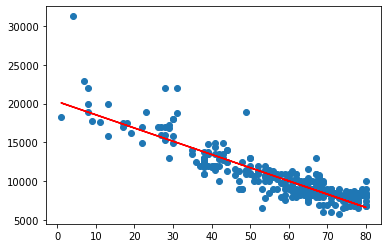

In [31]:
#Visualizing the line of best fit
plt.scatter(x=testingDataResults['Age'],y=testingDataResults['Price'])
plt.plot(testingDataResults['Age'],testingDataResults['Predicted Price'], color='red')
plt.show()

In [32]:
testingDataResults['APE']=np.abs((y_test-slr_prediction)/y_test)*100

#Printing the top 10 errors made by the model
testingDataResults.sort_values(by='APE',ascending=False)

,Age,Price,Predicted Price,APE
126,53.0,6500,11207.0,72.418376
169,69.0,5950,8477.0,42.466240
220,54.0,7750,11037.0,42.406982
232,4.0,31275,19569.0,37.428594
110,49.0,18950,11890.0,37.256951
...,...,...,...,...
249,66.0,8950,8989.0,0.432416
241,8.0,18950,18887.0,0.334597
129,43.0,12950,12914.0,0.280095
211,57.0,10500,10525.0,0.234106


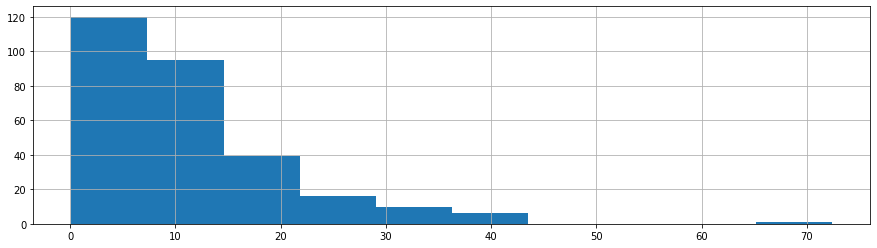

In [33]:
#Looking at the distribution of errors
testingDataResults['APE'].hist(figsize=(15,4))
plt.show()